In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from datetime import datetime as dt

In [13]:
data = pd.read_csv('AUDUSD_1 Min_Bid_2003.08.03_2019.02.24.csv', index_col = 'Time (UTC)')

In [15]:
data.head()

,Open,High,Low,Close,Volume
Time (UTC),,,,,
2003-08-03 21:00:00,0.65138,0.65175,0.65138,0.65162,2.181020e+09
2003-08-03 21:01:00,0.65165,0.65168,0.65151,0.65166,2.798383e+09
2003-08-03 21:02:00,0.65166,0.65170,0.65150,0.65155,1.165763e+10
2003-08-03 21:03:00,0.65150,0.65168,0.65150,0.65153,7.334110e+09
2003-08-03 21:04:00,0.65153,0.65169,0.65149,0.65155,6.290755e+09


In [25]:
data.describe()

,Open,High,Low,Close,Volume
count,5.839080e+06,5.839080e+06,5.839080e+06,5.839080e+06,5.839080e+06
mean,8.352221e-01,8.353643e-01,8.350855e-01,8.352213e-01,5.612613e+04
std,1.152958e-01,1.152638e-01,1.153243e-01,1.152961e-01,1.445432e+07
min,6.006300e-01,6.006800e-01,6.005500e-01,6.006700e-01,0.000000e+00
25%,7.474100e-01,7.476000e-01,7.472400e-01,7.474000e-01,2.500000e+01
50%,7.862500e-01,7.864800e-01,7.860800e-01,7.862500e-01,5.482000e+01
75%,9.258400e-01,9.259300e-01,9.257600e-01,9.258400e-01,1.055400e+02
max,1.107930e+00,1.107970e+00,1.107610e+00,1.107930e+00,1.259005e+10


## Figure. AUDUSD for all period (2003 - 2019)

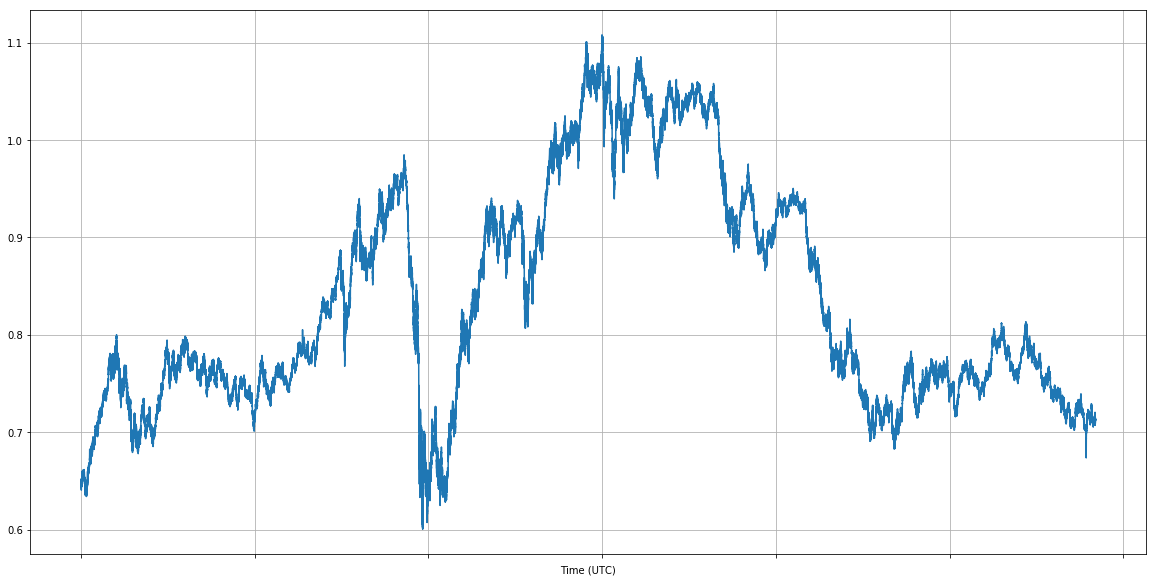

In [462]:
date = '2003-08-06 00:00:00'
temp = data.Close
d = np.array(temp)
n = len(d)
temp.plot(figsize = (20,10))
plt.grid()

In [463]:
tag = np.array([None] * n)

In [464]:
n = len(d)
l = d[0]
h = d[0]
l3 = l2 = l1 = 0
h3 = h2 = h1 = 0
ind = True
for i in range(1, len(d)):
    
    if d[i] < l:
        l1 = l = d[i]
        ind_l1 = i
        if ind:
            h = l
        
    elif d[i] < h :
        if h - d[i] >= 0.006:
            h3 = h2 = h1 = h
        elif h - d[i] >= 0.004:
            h2 = h1 = h
        elif h - d[i] >= 0.002:
            h1 = h
            
    elif h < d[i]:
        if d[i] - l >= 0.006 and d[i] > h3:
            h = h3 = h2 = h1 = d[i]
            l3 = l2 = l1 = l
            ind_l3 = ind_l2 = ind_l1
            ind_h3 = ind_h2 = ind_h1 = i
            ind = False
        elif d[i] - l >= 0.004 and d[i] > h2:
            h = h2 = h1 = d[i]
            l2 = l1 = l
            ind_l2 = ind_l1
            ind_h2 = ind_h1 =i
            ind = False
        elif d[i] - l >= 0.002 and d[i] > h1:
            h = h1 = d[i]
            l1 = l
            ind_h1 = i
            ind = False

In [465]:
l1, l2, l3, data.index[ind_l1] , data.index[ind_l2], data.index[ind_l3]

(0.60067,
 0.60067,
 0.60067,
 '2008-10-27 21:01:00',
 '2008-10-27 21:01:00',
 '2008-10-27 21:01:00')

In [466]:
h1, h2, h3, data.index[ind_h1]

(1.1079299999999999,
 1.1079299999999999,
 1.1079299999999999,
 '2011-07-27 07:32:00')

In [468]:
if ind_l1 != 0:
    tag[ind_l1] = 'l1'
if ind_l2 != 0:
    tag[ind_l2] = 'l1, l2'
if ind_l3 != 0:
    tag[ind_l3] = 'l1, l2, l3'

In [469]:
if ind_h1 != 0:
    tag[ind_h1] = 'h1'
if ind_h2 != 0:
    tag[ind_h2] = 'h1, h2'
if ind_h3 != 0:
    tag[ind_h3] = 'h1, h2, h3'

In [470]:
data['Tags'] = pd.Series(tag, index = data.index[:n])

In [472]:
answ = data[['Close','Tags']][:n]

In [474]:
answ

,Close,Tags
Time (UTC),,
2003-08-03 21:00:00,0.65162,None
2003-08-03 21:01:00,0.65166,None
2003-08-03 21:02:00,0.65155,None
2003-08-03 21:03:00,0.65153,None
2003-08-03 21:04:00,0.65155,None
2003-08-03 21:05:00,0.65149,None
2003-08-03 21:06:00,0.65159,None
2003-08-03 21:07:00,0.65148,None
2003-08-03 21:08:00,0.65148,None


In [459]:
answ.to_csv('AUDUSD_answ.csv')